<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Handling Imbalance Data
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• Imbalanced data refers to a situation where the distribution of classes within a dataset is not uniform. 
<br>
• This is particularly common in classification problems such as fraud detection, disease diagnosis or rare event prediction where one class (the majority class) significantly outnumbers the other class (the minority class). 
<br>
• For example, in a dataset of 1000 transactions where only 50 are fraudulent you have a 95% majority class (non-fraudulent) and a 5% minority class (fraudulent).
<br>
<br>
<strong>Problems with Imbalanced Data</strong>
<br>
-> <strong>Model Bias :</strong> Machine learning algorithms tend to learn patterns from the majority class and may ignore or misclassify instances of the minority class.
<br>
-> <strong>Misleading Accuracy :</strong> A high overall accuracy may be misleading if the model is primarily predicting the majority class correctly while failing to predict the minority class.
<br>
-> <strong>Poor Generalization :</strong> The model might not generalize well to new, unseen data particularly for the minority class.
</div>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting Theme for Plots
sns.set_theme('notebook')

In [3]:
# Reading CSV File
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Shape of the DataFrame
df.shape

(284807, 31)

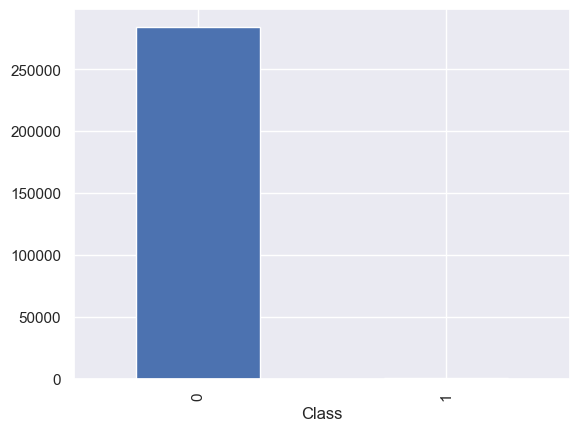

In [5]:
# Imbalance in Data
df['Class'].value_counts().plot(kind='bar')
plt.show()

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• <strong>Training Set :</strong> Used to train the model.
<br>
• <strong>Testing Set :</strong> Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• <strong>arrays :</strong> This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• <strong>test_size :</strong> Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• <strong>random_state :</strong> Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• <strong>shuffle :</strong> A boolean that indicates whether to shuffle the data before splitting.
</div>

In [6]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [7]:
# Defining Features and Target Variables
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Shape of Training and Testing Set
print(X_train.shape, X_test.shape)

(227845, 30) (56962, 30)


In [10]:
# Importing DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Creating DecisionTree Object
tree1 = DecisionTreeClassifier()

In [12]:
# Fitting model on Original Data
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Prediction from Trained Model
y_pred = tree1.predict(X_test)

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• A classification report provides a detailed evaluation of the performance of a classification model.
<br>
• It typically includes several key metrics that help you understand how well your model is performing, especially when dealing with imbalanced datasets.
<br>
<br>
<strong>Here's a breakdown of the components usually found in a classification report :</strong>
<br>
<br>
<strong>1. Precision</strong>
<br>
• Definition : The ratio of true positive predictions to the total predicted positives (true positives + false positives).
<br>
• Interpretation : Indicates the accuracy of positive predictions. High precision means that when the model predicts a positive class, it is often correct.
$$\text{Precision} = \frac{TP}{TP + FP}$$
<strong>2. Recall (Sensitivity)</strong>
<br>
• Definition : The ratio of true positive predictions to the actual positives (true positives + false negatives).
<br>
• Interpretation : Measures how well the model identifies positive instances. High recall indicates that most of the actual positives are captured.
$$\text{Recall} = \frac{TP}{TP + FN}$$
<strong>3. F1 Score</strong>
<br>
• Definition : The harmonic mean of precision and recall, providing a balance between the two.
<br>
• Interpretation : Useful for imbalanced classes, as it considers both false positives and false negatives. A high F1 score indicates a good balance between precision and recall.
$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
<strong>4. Accuracy</strong>
<br>
• Definition : The ratio of correct predictions to the total predictions.
<br>
• Interpretation : While useful, accuracy can be misleading in imbalanced datasets since it does not differentiate between class types.
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
<strong>5. Support</strong>
<br>
• Definition : The number of actual occurrences of each class in the specified dataset.
<br>
• Interpretation : Provides context for precision and recall metrics, indicating how many instances were available for each class.
<br>
</div>

In [15]:
# Importing classification_report
from sklearn.metrics import classification_report

In [16]:
# classification_report of Original Data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.81      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Oversampling Techniques</strong>
<br>
-> Oversampling aims to balance the class distribution by increasing the number of instances in the minority class.
<br>
<strong>1. Random Oversampling</strong>
<br>
• Description : Randomly duplicates instances from the minority class to balance class distribution.
<br>
• Pros : Simple to implement, retains all minority data.
<br>
• Cons : Risk of overfitting, no new information added.
<br>
<strong>2. SMOTE (Synthetic Minority Over-sampling Technique)</strong>
<br>
• Description : Generates synthetic samples by interpolating between existing minority instances and their neighbors.
<br>
• Pros : Reduces overfitting by creating new data points.
<br>
• Cons : Can introduce noise, computationally intensive.
<br>
<br>
<strong>Undersampling Techniques</strong>
<br>
-> Undersampling aims to balance the class distribution by reducing the number of instances in the majority class.
<br>
<strong>1. Random Undersampling</strong>
<br>
• Description : Randomly removes instances from the majority class to balance the dataset.
<br>
• Pros : Simple and quick, reduces dataset size.
<br>
• Cons : Risk of underfitting, may lose important information.
<br>
<br>
</div>

<div style="text-align: center;">
<img src='https://raw.githubusercontent.com/TheMrityunjayPathak/FeatureEngineering/refs/heads/main/Handling%20Imbalance%20Data/images/Imbalance%20Data.png'/>
</div>

In [17]:
# Importing RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [18]:
# Creating RandomUnderSampler Object
rus = RandomUnderSampler()

In [19]:
# Under Sampling the Data
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [20]:
# Values before under_sampling
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [21]:
# Values after under_sampling
y_rus.value_counts()

Class
0    394
1    394
Name: count, dtype: int64

<div style="text-align: center;">
<img style='border:2px solid black;'src='https://raw.githubusercontent.com/TheMrityunjayPathak/FeatureEngineering/refs/heads/main/Handling%20Imbalance%20Data/images/Undersampling.png'/>
</div>

In [22]:
# Shape of Data after under_sampling
X_rus.shape

(788, 30)

In [23]:
# Creating DecisionTree Object
tree2 = DecisionTreeClassifier()

In [24]:
# Fitting model on under_sampled Data
tree2.fit(X_rus, y_rus)

DecisionTreeClassifier()

In [25]:
# Prediction from Trained Model
y_pred_rus = tree2.predict(X_test)

In [26]:
# classification_report of under_sampled Data
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



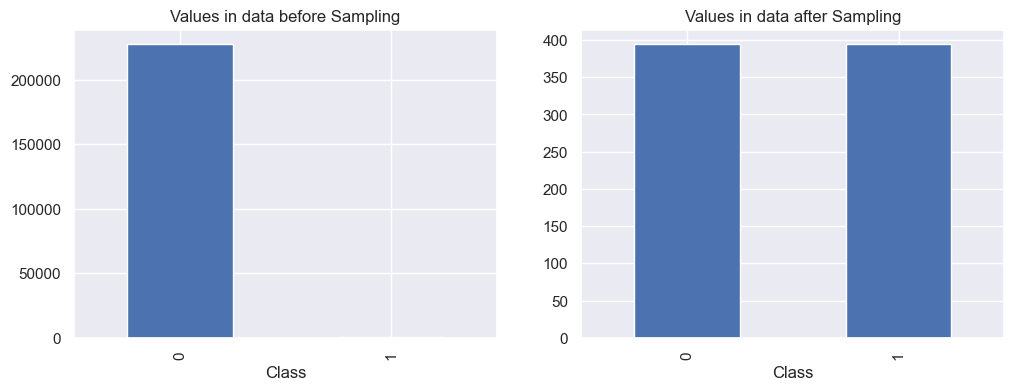

In [27]:
# Comparison of values before and after under_sampling
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Values in data before Sampling")
y_train.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Values in data after Sampling")
y_rus.value_counts().plot(kind='bar')
plt.show()

In [33]:
# Importing RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [29]:
# Creating RandomOverSampler Object
ros = RandomOverSampler()

In [30]:
# Over Sampling the Data
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [31]:
# Values before over_sampling
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [32]:
# Values after over_sampling
y_ros.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

<div style="text-align: center;">
<img style='border:2px solid black;' src='https://raw.githubusercontent.com/TheMrityunjayPathak/FeatureEngineering/refs/heads/main/Handling%20Imbalance%20Data/images/Oversampling.png'/>
</div>

In [34]:
# Shape of Data after over_sampling
X_ros.shape

(454902, 30)

In [35]:
# Creating DecisionTree Object
tree3 = DecisionTreeClassifier()

In [36]:
# Fitting model on over_sampled Data
tree3.fit(X_ros, y_ros)

DecisionTreeClassifier()

In [37]:
# Prediction from Trained Model
y_pred_ros = tree3.predict(X_test)

In [38]:
# classification_report of over_sampled Data
print(classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.71      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



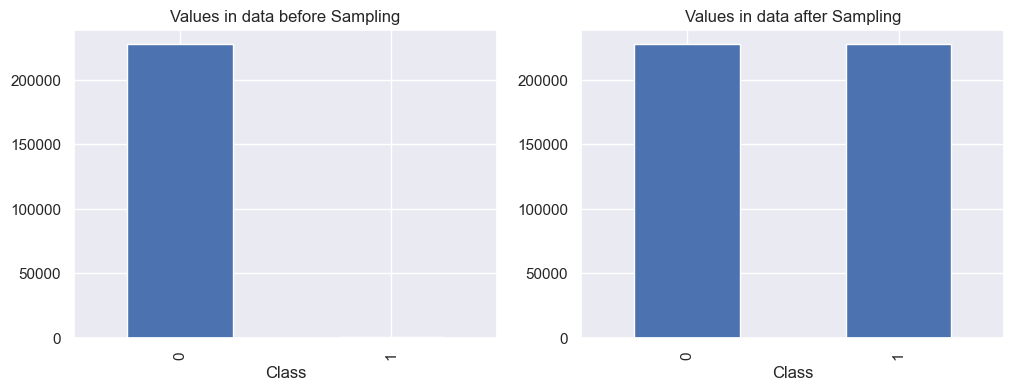

In [39]:
# Comparison of values before and after over_sampling
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Values in data before Sampling")
y_train.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Values in data after Sampling")
y_ros.value_counts().plot(kind='bar')
plt.show()

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• SMOTE stands for Synthetic Minority Over-sampling Technique. 
<br>
• It is a popular method used to address class imbalance in datasets particularly in binary classification problems. 
<br>
• When one class (the minority class) has significantly fewer instances than the other class (the majority class), it can lead to biased models that perform poorly on the minority class. 
<br>
• SMOTE helps to mitigate this issue by generating synthetic data points for the minority class.
<br>
<br>
<strong>Algorithm Steps</strong>
<br>
<strong>1. Identify the Minority Class Instances</strong>
<br>
-> Find all the examples from the minority class.
<br>
<strong>1. Select Nearest Neighbors</strong>
<br>
-> For each example in the minority class find its nearest neighbors. 
<br>
-> For each instance $x_i$ in the minority class, find $k$ nearest neighbors. The most common choice is $k = 5$. 
<br>
-> For instance, if you choose 5 neighbors you’ll look for the 5 closest examples in the minority class.
<br>
-> The distance metric (typically Euclidean distance) can be defined as:
$$d(x_i, x_j) = \sqrt{\sum_{m=1}^{n}(x_{im} - x_{jm})^2}$$
where, $x_{im}$ and $x_{jm}$ are the feature values of instances $i$ and $j$ and $n$ is the number of features.
<br>
<strong>3. Generate Synthetic Instances</strong>
<br>
-> For each minority instance $x_i $
<br>
-> Randomly select one of the $k$ nearest neighbors, say $x_{nn}$.
<br>
-> Generate a synthetic instance $x_{syn}$ using the following formula:
$$x_{syn} = x_i + \lambda \cdot (x_{nn} - x_i)$$
where, $\lambda$ is a random number sampled from the uniform distribution $[0, 1]$.
<br>
<strong>4. Repeat</strong>
<br>
• This process is repeated until the desired number of synthetic instances is generated to balance the classes.
</div>

In [40]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [41]:
# Creating SMOTE Object
smote = SMOTE()

In [42]:
# SMOTE Sampling the data
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [43]:
# Values before SMOTE
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [44]:
# Values after SMOTE
y_smote.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [45]:
# Shape of Data after SMOTE
X_smote.shape

(454902, 30)

In [46]:
# Creating DecisionTree Object
tree4 = DecisionTreeClassifier()

In [47]:
# Fitting model on SMOTE Data
tree4.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [48]:
# Prediction from Trained Model
y_pred_smote = tree4.predict(X_test)

In [49]:
# classification_report of SMOTE Data
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962



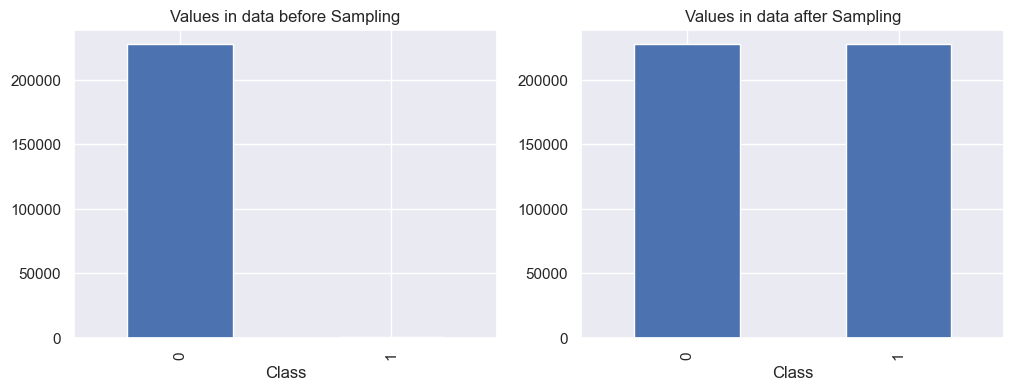

In [50]:
# Comparison of values before and after SMOTE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Values in data before Sampling")
y_train.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Values in data after Sampling")
y_smote.value_counts().plot(kind='bar')
plt.show()